# Introduction
### Auction Fraud
Online auctions have become a very successful e-commerce application. As an example, eBay,
the largest auction site, recorded a net revenue of 9.7 billion U.S dollars in 2017, and
the number of active users reached 170 million worldwide.
 Despite their popularity, e-auctions are very attractive to malicious moneymakers because auctions are vulnerable to cyber-crime and represents one of the top cyber-crimes ccording to the Internet Crime
Complain Centre (IC3), auction fraud. 

 In-auction fraud, which happens during the bidding period, such as shill bidding, bid
sniping and bid shielding do not leave any clear evidence, and worst of all, it is not noticed
by honest bidders and victims i.e. auction winners. Indeed, it is challenging to detect
fraud occurring during the bidding period,this study focuses on this type.

 **Shill Bidding Fraud**
 
Shill Bidding (SB) is the most common auction fraud but the most difficult to detect due
to its similarity to normal bidding behaviour. A shill bidder is a malicious
user (the fraudulent seller and/or his accomplices) who bids aggressively in order to drive up
the price of the product only to benefit the owner of the auction. SB may cause a massive
money loss for genuine sellers and bidders in the context of high priced products and also
products with unknown value in the market, such as antiques.Excessive SB could lead to a market failurediscouraging users and in turn may negatively impacts the auctioning business.

**Source:**

Ahmad Alzahrani and Samira Sadaoui
alzah234 '@' uregina.ca and sadaouis '@' uregina.ca
Department of Computer Science
University of Regina
Regina, SK, CANADA, S4S 0A2


Data Set Information:

Attribute Information:

**Record ID:** Unique identifier of a record in the dataset.

**Auction ID:** Unique identifier of an auction.

**Bidder ID:**Unique identifier of a bidder.

**Bidder Tendency:** A shill bidder participates exclusively in auctions of few sellers rather than a diversified lot. This is a collusive act involving the fraudulent seller and an accomplice.

**Bidding Ratio:**  A shill bidder participates more frequently to raise the auction price and attract higher bids from legitimate participants.

**Successive Outbidding:** A shill bidder successively outbids himself even though he is the current winner to increase the price gradually with small consecutive increments.

**Last Bidding:** A shill bidder becomes inactive at the last stage of the auction (more than 90\% of the auction duration) to avoid winning the auction.

**Auction Bids:**
Auctions with SB activities tend to have a much higher number of bids than the average of bids in concurrent auctions.

**Auction Starting Price:** a shill bidder usually offers a small starting price to attract legitimate bidders into the auction.

**Early Bidding:**
A shill bidder tends to bid pretty early in the auction (less than 25\% of the auction duration) to get the attention of auction users.

**Winning Ratio:** A shill bidder competes in many auctions but hardly wins any auctions.

**Auction Duration:** How long an auction lasted.

**Class:** 0 for normal behaviour bidding; 1 for otherwise.




### Aim
To developed five Shill Bidding  detection models, and compare their pre-dictive performance based on several quality metrics. Specific aim was to deter-mine the optimal Shill Bidding classifier, which will be the key to distinguishing between genuine and fraudulent bidders. 

## Future Work

Fraud data are highly imbalanced, and this class imbalance has been shown to reduce
the performance of baseline classifiers. In this situation, the
classifiers are biased towards the normal class, which means that fraud instances tend
to be classified as normal ones. 


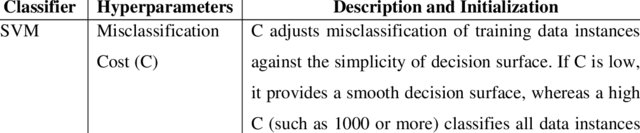

### <a id='21'>Load Packages</a>  

In [141]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split as tts, GridSearchCV
from sklearn.model_selection import cross_val_score as c_val
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict as c_val_pred


from sklearn.ensemble import IsolationForest
from sklearn.mixture import GaussianMixture

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, silhouette_score 
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, average_precision_score
from collections import Counter

import warnings   # warnings helps us suppress warnings. the object warning call the method 'filterwarnings' to ignore
warnings.filterwarnings ("ignore")

random_state = 42

### <a id='22'>Define Metadata</a>  

In [2]:
target_class = "class"

labels = ["Normal bid", "Anomaly bid"]


 **The following file is downloaded fromhttps://archive.ics.uci.edu/ml/machine-learning-databases/00562/
input_file_name = 'Shill Bidding Dataset.csv'**

## <a id='3'>Load Data</a>  

In [3]:
df= pd.read_csv ("Shill Bidding Dataset.csv")

While the data has been read into our df object, a random sample of the dataset is first viewed followed by the first and last few observations to find out if unwanted data such as metadata are attached to the head region or other unwanted data to the bottom. This is basically a quality check process and will determine what actions will follow next.

In [4]:
df.sample(3)

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
1885,4507,1852,n***.,0.333333,0.100000,0.0,0.727720,0.000000,0.000000,0.727720,1.0,1,0
239,572,582,i***i,0.008264,0.028571,0.0,0.870359,0.485714,0.993593,0.870359,0.0,3,0
4925,11713,279,9***9,0.022222,0.066667,0.0,0.817652,0.000000,0.000000,0.817652,0.0,7,0


Rename some long column names  for easy refferencing

In [5]:
df = df.rename(columns = {"Successive_Outbidding":"Suc_Outbdin", "Auction_Duration": "Auc_Duration", 
                "Starting_Price_Average":"Start_Price_Avg"})

In [6]:
df.head(3)

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Suc_Outbdin,Last_Bidding,Auction_Bids,Start_Price_Avg,Early_Bidding,Winning_Ratio,Auc_Duration,Class
0,1,732,_***i,0.200000,0.4,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.2,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.2,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0


In [7]:
df.tail(3)

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Suc_Outbdin,Last_Bidding,Auction_Bids,Start_Price_Avg,Early_Bidding,Winning_Ratio,Auc_Duration,Class
6318,15138,2481,h***t,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.0,7,0
6319,15139,2481,d***d,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.0,7,0
6320,15144,2481,a***l,0.016393,0.043478,0.0,0.340351,0.217391,0.993593,0.340351,0.0,7,0


No trouble with loading the data. Both the head and tail are clean. 
Next, format the columns to have lower case for easy typing.

In [8]:
df.columns = df.columns.str.lower()

df.columns

Index(['record_id', 'auction_id', 'bidder_id', 'bidder_tendency',
       'bidding_ratio', 'suc_outbdin', 'last_bidding', 'auction_bids',
       'start_price_avg', 'early_bidding', 'winning_ratio', 'auc_duration',
       'class'],
      dtype='object')

## <a id=4 > Data Insights

### <a id='41'>Data Structure</a> 

check data shape

In [9]:
df.shape

(6321, 13)

Inspect the data types to see if theres need to format types

In [10]:
df.dtypes

record_id            int64
auction_id           int64
bidder_id           object
bidder_tendency    float64
bidding_ratio      float64
suc_outbdin        float64
last_bidding       float64
auction_bids       float64
start_price_avg    float64
early_bidding      float64
winning_ratio      float64
auc_duration         int64
class                int64
dtype: object

Are there duplicate rows or observations ?

In [11]:
df.duplicated().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   record_id        6321 non-null   int64  
 1   auction_id       6321 non-null   int64  
 2   bidder_id        6321 non-null   object 
 3   bidder_tendency  6321 non-null   float64
 4   bidding_ratio    6321 non-null   float64
 5   suc_outbdin      6321 non-null   float64
 6   last_bidding     6321 non-null   float64
 7   auction_bids     6321 non-null   float64
 8   start_price_avg  6321 non-null   float64
 9   early_bidding    6321 non-null   float64
 10  winning_ratio    6321 non-null   float64
 11  auc_duration     6321 non-null   int64  
 12  class            6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


None of the columns have null values at first glance, but we will run a more thorough diagnostic.

In [13]:
df.isnull().any().sum()

0

It is confirmed that there are no null values in the dataset.

### <a id='43'>Unique Value Checking/ Target class distribiution</a> 

In [14]:
 df["class"].unique()

array([0, 1])

In [15]:
df["class"].value_counts()

0    5646
1     675
Name: class, dtype: int64

In [16]:
print("Percentage of Negative class is {} %".format(
    round(df["class"].value_counts()[0]/len(df) * 100,3)))

print("Percentage of Positive class is {} %".format(
    round(df["class"].value_counts()[1]/len(df) * 100,3)))


Percentage of Negative class is 89.321 %
Percentage of Positive class is 10.679 %


Pseudocode: Take the count of the negative/positive class (0/1), 
            Divide by the lenght of the data frame(6321),
            Multiply by 100 and round it up to 3 decimal place.
            
  The result above shows that we have a dataset that is highly inbalanced. This will lead to a machine model that will misclassify many of the positive class i.e the shill bidders as normal bidders since the data will be biased towards the normal bidders. We there will have to balance this dataset to ensure building a model that will function generally on unseen data.

 Write a for loop to conduct a search through each column in the dataframe and returns the count of unique values. 

In [17]:
for column in df.columns:
    print(column, len(df[column].unique()))

record_id 6321
auction_id 807
bidder_id 1054
bidder_tendency 489
bidding_ratio 400
suc_outbdin 3
last_bidding 5807
auction_bids 49
start_price_avg 22
early_bidding 5690
winning_ratio 72
auc_duration 5
class 2


### <a id='43'>Blank/Trailing space Checking</a> 

Non-obvious nulls such as blanks: The line items where there are spaces

In [18]:
 blank_space_col_list = []
object_cols = df.select_dtypes(include=['object']).columns

for col in object_cols: 
    if sum(df[col]==' '):
        blank_space_col_list.append(col)

print('Identified {} features with atleast one blank space'.format(
        len(blank_space_col_list)))

Identified 0 features with atleast one blank space


### <a id='43'>Check for quasi values</a> 

Lets remove the variables that have more than 99% of their values as the same 
ie their standard deviation is less than 1 %

In [19]:
numeric_df = df._get_numeric_data()
constant_numeric_col_list = [col for col in numeric_df.columns if numeric_df[col].std()<0.01]

print('Identified {} numeric features that have quasi-constant values'.format(
        len(constant_numeric_col_list)))
    

Identified 0 numeric features that have quasi-constant values


### <a id='42'>Summary Stats</a> 

We are going to check out each column's summary statistics
Note that only the numerical columns will be described
Also you will want to exclude the discrete columns whose summary stats will give non-sensical values like 'customer_id' 

In [20]:
df.describe()

,record_id,auction_id,bidder_tendency,bidding_ratio,suc_outbdin,last_bidding,auction_bids,start_price_avg,early_bidding,winning_ratio,auc_duration,class
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,7535.829457,1241.388230,0.142541,0.127670,0.103781,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093,0.106787
std,4364.759137,735.770789,0.197084,0.131530,0.279698,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629,0.308867
min,1.000000,5.000000,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3778.000000,589.000000,0.027027,0.043478,0.000000,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000,0.000000
50%,7591.000000,1246.000000,0.062500,0.083333,0.000000,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000,0.000000
75%,11277.000000,1867.000000,0.166667,0.166667,0.000000,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000,0.000000
max,15144.000000,2538.000000,1.000000,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000,1.000000


All the numbers appear to be  between 0 and 15144, taking into account the min and max values.We can check further with a visual.

<AxesSubplot:>

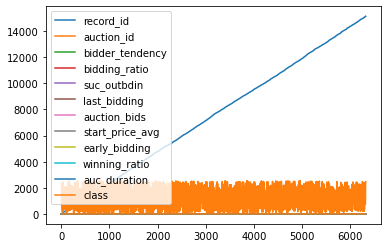

In [21]:
df.plot()

### <a id='42'>Exploratory Data Analysis</a> 

Lets take a closer look at the class column

<AxesSubplot:xlabel='class', ylabel='Density'>

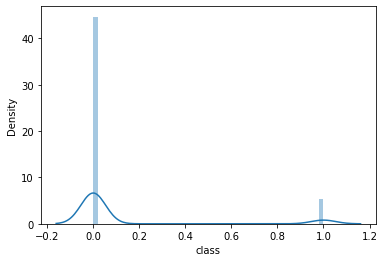

In [22]:
sns.distplot(df["class"])

we can observe that in both cases, the distribution of the feature values is gaussian although with higher variance in the anomaly class. However, the distrubtion of the feauture in itself is skewed. We can look further by making a boxplot.

<AxesSubplot:xlabel='class'>

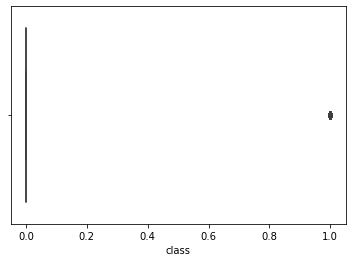

In [23]:
sns.boxplot(df["class"])

This visual is not easy to read but we can see that there is an outlier. Outliers denote samples that are not compatible with the rest of the data, such as extreme values that are out of or at the fringes of a given range. Outlier labeling method called Inter Quartile Range (IQR) is employed to calculate the outlier scores for the columns and plotted for visuals.

In [24]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

record_id          7499.000000
auction_id         1278.000000
bidder_tendency       0.139640
bidding_ratio         0.123188
suc_outbdin           0.000000
last_bidding          0.812434
auction_bids          0.454545
start_price_avg       0.993593
early_bidding         0.800140
winning_ratio         0.851852
auc_duration          4.000000
class                 0.000000
dtype: float64


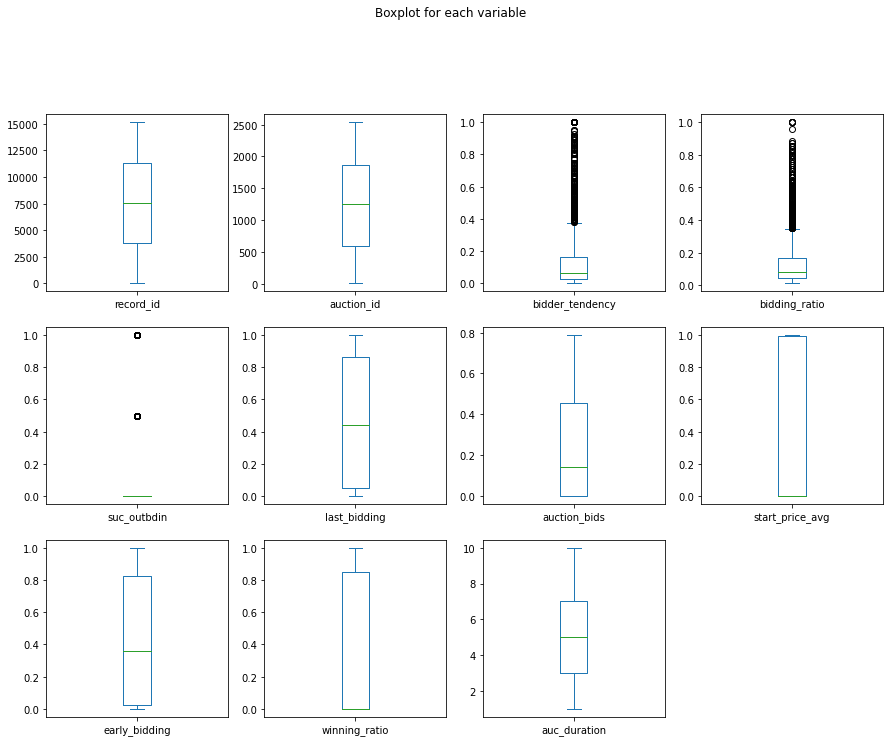

In [25]:
df.drop('class', axis = 1).plot(kind = 'box', subplots = True, layout = (4, 4), figsize = (15, 15),
                                 title = 'Boxplot for each variable');

Let's make a visual observation of the class value distribution 

In [26]:
print("Percentage of Negative class is {} %".format(
    round(df["class"].value_counts()[0]/len(df) * 100,3)))

print("Percentage of Positive class is {} %".format(
    round(df["class"].value_counts()[1]/len(df) * 100,3)))


Percentage of Negative class is 89.321 %
Percentage of Positive class is 10.679 %


0    5646
1     675
Name: class, dtype: int64

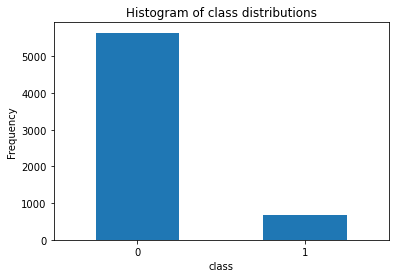

In [27]:
plt.figure(figsize = (6,4))
pd.value_counts(df["class"]).plot.bar()
plt.title('Histogram of class distributions')
plt.xlabel("class")
plt.xticks(range(2), rotation = 0)
plt.ylabel('Frequency')
df["class"].value_counts()

In [28]:
normal = df[df["class"] == 0]
anomaly = df[df["class"] == 1]

normal.shape, anomaly.shape

((5646, 13), (675, 13))

We can observe that our target feature have a heavily skewed distribution seeing that the positive class is under-representedand and differ from the negative class which can be considered as anomaly case.

Anomaly and outlier detection is a very special problem in data science. The goal of outlier detection is to identify instances seen as “anomalous.” These are instances not conforming to some standard of what the average case in a dataset looks like. Anomalies/outliers by definition are few and far between. This makes it a particularly difficult problem, as in some cases, traditional supervised algorithms might not work very well.

Therefore three approches are going to be employed in these project.
The first is where we employ algorithms that are specific for dealing with anomalies. One will be used : Isolation forest and then compare the result with those from supervised and unsupervised learning.

The second approach will be to consider that the two classes are almost inseperable, almost intersecting since some cases may be found to be common to both cases such as bidding and not winning. For this we employ clustering method- k-means clustering.

Support vector machine, Logistic regression, Gaussian naive bayes and Random forest models represent the third approach. We will also comapare the results to be able to select the best and alsomdecide the best approach.


But then let us probe the data further by looking at the "auction_duration"  and "start_price_average" for the cases

In [29]:
normal.auc_duration.describe()

count    5646.000000
mean        4.597060
std         2.462196
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: auc_duration, dtype: float64

In [30]:
anomaly.auc_duration.describe()

count    675.000000
mean       4.765926
std        2.500153
min        1.000000
25%        3.000000
50%        5.000000
75%        7.000000
max       10.000000
Name: auc_duration, dtype: float64

we conclude that the auction duration is same for both cases. 

In [31]:
a_n = normal.start_price_avg.mean()
a_an = anomaly.start_price_avg.mean()

print(a_n, a_an)

0.46560509069305234 0.5331812691244459


Theres no significant difference.
Let's take a look at the auction_bids feature and see if truely the anomalous case has more bids

<AxesSubplot:xlabel='auction_bids', ylabel='Count'>

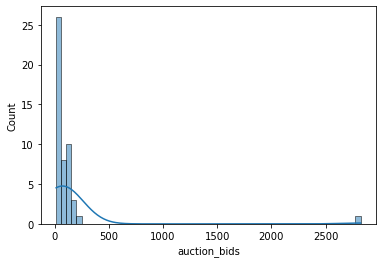

In [32]:
plt.figure(figsize = (6,4))
sns.histplot(df.auction_bids.value_counts(), kde = True, cbar = True) 

#### <a id='42'>Feature Engineering</a> 

In [33]:
df["bid_interval"]= df["last_bidding"] - df["early_bidding"]

df["bid_interval"]

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000076
          ...   
6316    0.052199
6317    0.005744
6318    0.000000
6319    0.068279
6320    0.000000
Name: bid_interval, Length: 6321, dtype: float64

### <a id='42'>Data Preparation</a> 

To show correlation, we have to create a matrix. There are basically two ways to do that which are: By calling the method corr() or by creating a pivot table. Here, we explore the first option.

We pass a diverging colourmap "vlag" so that 0.0 is white. we reset the label to better show disticnt color variation.
Strong correlation is observed in the diagonal sqaures with maximum number of 1 since each column is plotted agaist itself. Correlation in the red color column represent negatively directed correlation and strenthens towards -1 while positive correlation is represented in the blue color column and increses up to 1. squares with white color tends towards 0 and have no correlation.

To be able to annotate i.e map the correlation scores to the squares in the heatmap without running the rist of overlapping scores, the scores have been rounded to 1 decimal place by calling on the method round().

<AxesSubplot:>

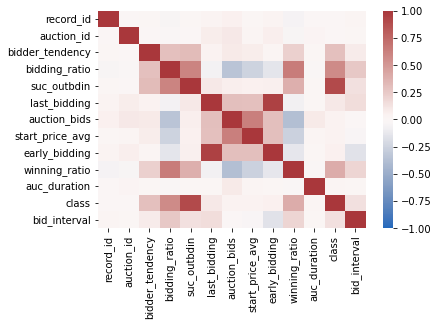

In [34]:
corr = df.corr()
df_mtrx = df.corr().round(1)
sns.heatmap(corr, vmin=-1.0, vmax=1.0, cmap = "vlag")

It can be observed that the matrix is symmetric i.e mirror images and can thus make the heatmap clearer by masking one side of the symmetry and annotating.

<AxesSubplot:>

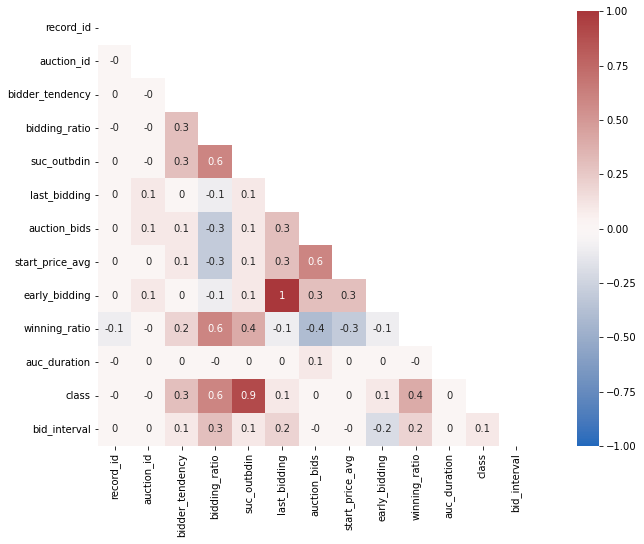

In [35]:
mtrx_msk = np.triu (np.ones_like(df_mtrx, dtype = bool))
plt.figure(figsize= (16,8))
sns.heatmap(df_mtrx, vmin= -1, vmax= 1, annot= True, cmap= "vlag", mask= mtrx_msk, square= 1)

As seen, the feature with the most positive corellation with class is the successive outbidding. This is the single most important feature that predict whether an auction bidder is a shill bidder or a normal.others are the bidding ratio and winning ratio respectively although winning ration is weak.

Likewise, winning ratio and auction bids have the highest negative corelation meaning that as the number of auction bids increases, the winning ration decreses and vice versa.

The engineered feature bid_interval does not have any real impact on the data except for its weak possitive correlation with bidding ratio.

The columns auction id and record id will be removed as they have little to no impacton the data.

In [36]:
col_drop = df[["auction_id","record_id", "bidder_id"]]

df1 = df.drop(col_drop, axis = 1)
df1.shape

(6321, 11)

#### <a id='42'>Splitting Data</a>

In [160]:
X = df1.iloc[:,:-1]
y = df["class"]

X.dtypes

bidder_tendency    float64
bidding_ratio      float64
suc_outbdin        float64
last_bidding       float64
auction_bids       float64
start_price_avg    float64
early_bidding      float64
winning_ratio      float64
auc_duration         int64
class                int64
dtype: object

For X, intiger-locate all rows, all columns except the last column.
For why, take the class column

In [38]:
print(X.shape, y.shape)

(6321, 10) (6321,)


Since some of the models are distance-dependent, e.g SVM, it is good practice to standardize our data allowing them to be in the same scale so that we can reduce process space and time and make it easy for the computer to learn.

In [39]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [40]:
X_train, X_test, y_train, y_test = tts(X_sc, y, test_size = 0.2,  random_state = 42)

print ( "shapes after splitting: X_train.shape:", X_train.shape, ", " "X_test.shape:", X_test.shape, ", " "y_train.shape:", y_train.shape, ", " "y_test.shape:", y_test.shape)
 

shapes after splitting: X_train.shape: (5056, 10) , X_test.shape: (1265, 10) , y_train.shape: (5056,) , y_test.shape: (1265,)


## <a id='42'>Model Prediction</a>

### <a id='42'> Supervised Learning Approach (Classification)</a>

Classification algorithms are used to predict the values of a categorical variable. The target variable can be binary(Yes/No)- as the case in this dataset, or multi_class (positive/negative/netral). The algorithm will ascertain whether the target event will happen or not by generating probability scores for the targhet variable.

The target class (normal_bid/abnormal_bid) is an encoded, binary categorical type of data and hence justifies the use of the four classification algorithms used below. "https://livebook.manning.com/book/mastering-unlabeled-data/chapter-2/v-5/6". Gaussian mixture algorithm as also been used for it usefulness in this kind of situation where some datapoint may share features of two different groups.("https://serrano.academy/unsupervised-learning/")

Viz: 
Logistic Regression, Random Forest, Support Vector Machine and Gaussian Naive Bayes

In [41]:
def metrics_func (X_test, y_test, labels, classifier):
    y_pred = clf.predict(X_test)

    print(classification_report(y_test, y_pred, target_names=labels))
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,annot=True)
    metrics_dict = Counter()
   
    
    metrics_dict['Accuracy']  = float("{0:.4f}".format(accuracy_score(y_test, y_pred)))

    metrics_dict['Precision'] = float("{0:.4f}".format(precision_score(y_test, y_pred, average='macro')))
    metrics_dict['Recall'] = float("{0:.4f}".format(recall_score(y_test, y_pred, average='macro')))
    metrics_dict['F1'] = float("{0:.4f}".format(f1_score(y_test, y_pred, average='macro')))
    
    metrics_dict['ROC AUC'] = float("{0:.4f}".format(roc_auc_score(y_test, y_pred)))
    metrics_dict['Average_Precision'] = float("{0:.4f}".format(
                                        average_precision_score(y_test, y_pred, average='macro', sample_weight=None)))

    return metrics_dict

The above user function takes the following arguments:

Args:

The features (X_train, y_train), the target column class (label with binary categories 0/1) and the classifier sklearn classifier object stored in clf in each case.

The function **"Metrics_func ( )"** takes the fitted feature values (X_train,y_train), computes the prediction for (y_predict) for each classifier object and stores the result in a dictionary subclass called **Counter ( )** which can be very useful and I particularly find easy to use.The scores from the sklearn.metrics library are formatted to float of 4 decimal place.

It also computes visualization using the seaborn heatmap on the confussion matrix for the true and predicted values of the *class* values and prints the results.    

              precision    recall  f1-score   support

  Normal bid       1.00      1.00      1.00      1133
 Anomaly bid       1.00      1.00      1.00       132

    accuracy                           1.00      1265
   macro avg       1.00      1.00      1.00      1265
weighted avg       1.00      1.00      1.00      1265



Counter({'Accuracy': 1.0,
         'Precision': 1.0,
         'Recall': 1.0,
         'F1': 1.0,
         'ROC AUC': 1.0,
         'Average_Precision': 1.0})

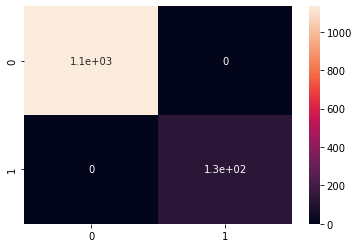

In [42]:
clf = LogisticRegression()
clf.fit(X_train, y_train)



lreg = metrics_func(X_test, y_test, labels, clf)
lreg

Classified the test set with 97% accuracy and also with good precision, reacll and F1 values. Misclassified 13 instances of anomaly_bid  as normal  and 21 normal_bid instance as abnormal_bid (positive class). Hopefully, we get better result with Gridsearch.

              precision    recall  f1-score   support

  Normal bid       1.00      1.00      1.00      1133
 Anomaly bid       1.00      1.00      1.00       132

    accuracy                           1.00      1265
   macro avg       1.00      1.00      1.00      1265
weighted avg       1.00      1.00      1.00      1265



Counter({'Accuracy': 1.0,
         'Precision': 1.0,
         'Recall': 1.0,
         'F1': 1.0,
         'ROC AUC': 1.0,
         'Average_Precision': 1.0})

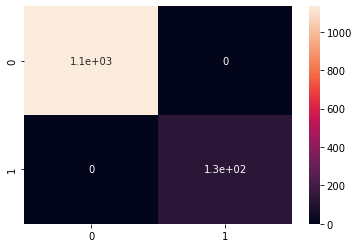

In [43]:
clf = SVC(C = 1, kernel='rbf', probability=True)
clf.fit(X_train, y_train)



svm = metrics_func(X_test, y_test, labels, clf)
svm

Classified the test set with 98% accuracy and also with good precision, reacll and F1 values. Misclassified 7 instances of anomaly_bid  as normal_bids  and 17 normal_bid instances as abnormal_bid (positive class). Hopefully, parameter tuning will yield even better result.

The above result show that the  SVM model was able to classify tumors into malignant/benign with 92% accuracy.¶

**macro average**
The macro average is the arithmetic mean of the individual class related to precision, memory, and f1 score. Macro average scores has been used because we need to treat all classes equally (since one member is largely represented than the other) to evaluate the overall performance of the classifier against the most common class labels.

**weighted average**
The weighted arithmetic mean is similar to an ordinary arithmetic mean, except that instead of each of the data points contributing equally to the final average, some data points contribute more than others.

              precision    recall  f1-score   support

  Normal bid       1.00      1.00      1.00      1133
 Anomaly bid       1.00      1.00      1.00       132

    accuracy                           1.00      1265
   macro avg       1.00      1.00      1.00      1265
weighted avg       1.00      1.00      1.00      1265



Counter({'Accuracy': 1.0,
         'Precision': 1.0,
         'Recall': 1.0,
         'F1': 1.0,
         'ROC AUC': 1.0,
         'Average_Precision': 1.0})

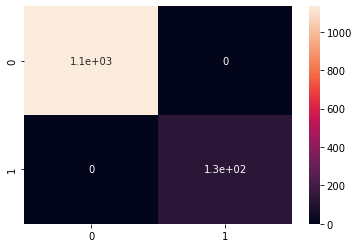

In [44]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)[:,1]

r_frst = metrics_func(X_test, y_test, labels, clf)
r_frst

Classified the test set with 99% accuracy and also with good precision, reacll and F1 values. Misclassified only 1 instance of anomaly bid  as normal  and only 8 normal_bid instance as abnormal_bid (positive class). Hopefully, parameter tuning will yield even better result.

              precision    recall  f1-score   support

  Normal bid       1.00      1.00      1.00      1133
 Anomaly bid       1.00      1.00      1.00       132

    accuracy                           1.00      1265
   macro avg       1.00      1.00      1.00      1265
weighted avg       1.00      1.00      1.00      1265



Counter({'Accuracy': 1.0,
         'Precision': 1.0,
         'Recall': 1.0,
         'F1': 1.0,
         'ROC AUC': 1.0,
         'Average_Precision': 1.0})

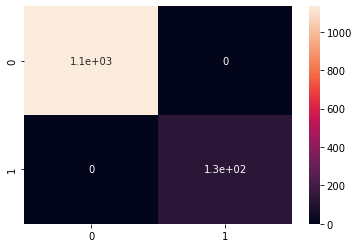

In [45]:
clf = GaussianNB()
clf.fit(X_train, y_train)


gn_bayes = metrics_func(X_test, y_test, labels, clf)
gn_bayes

Classified the test set with 97% accuracy. Misclassified only 1 anomaly bid case as normal  and 35 normal cases as abnormal bid (positive class). Hopefully, parameter tuning will yield a better result.

### <a id='42'> Model Comparison</a>

In [206]:
clf_dict = {"logreg":LogisticRegression(random_state=42), 
                   "random_forest":RandomForestClassifier(random_state=42), 
                   "naive_bayes":GaussianNB(),
                  "svm": SVC(), 
                  }

data = [lreg,svm,gn_bayes,r_frst]
metrics_df = pd.DataFrame(data,
columns = ['Accuracy','Precision','Recall','F1','ROC AUC','Average_Precision'],
index = [classifier_name for classifier_name in clf_dict.keys()])

metrics_df

,Accuracy,Precision,Recall,F1,ROC AUC,Average_Precision
logreg,1.0,1.0,1.0,1.0,1.0,1.0
random_forest,1.0,1.0,1.0,1.0,1.0,1.0
naive_bayes,1.0,1.0,1.0,1.0,1.0,1.0
svm,1.0,1.0,1.0,1.0,1.0,1.0


Here, we created a dict { } of the names and classifier objects, and initialized a dataframe with the columns that we want to store being the various metrics of interest and the models as row index.


For easy visualisation, lets sort the dataframe by the "Average_Precision" column in descending order and see how the models performed

In [203]:
metrics_df.sort_values(by=["Average_Precision"], ascending=False )

,Accuracy,Precision,Recall,F1,ROC AUC,Average_Precision
logreg,1.0,1.0,1.0,1.0,1.0,1.0
random_forest,1.0,1.0,1.0,1.0,1.0,1.0
naive_bayes,1.0,1.0,1.0,1.0,1.0,1.0
svm,1.0,1.0,1.0,1.0,1.0,1.0


In [204]:
from sklearn.model_selection import GridSearchCV

def tune_model(model, parameters, X_train, y_train):
    # perform k-fold cross-validation
    clf = GridSearchCV(model, parameters, cv=5)
    clf.fit(X_train, y_train)
    
    # print the best parameters and score
    print("Best parameters:", clf.best_params_)
    print("Best score:", clf.best_score_)
    
    return clf.best_estimator_


In [205]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Define the values to be tested for each hyperparameter
param_grid_lr = {'criterion': ['gini', 'entropy'],
                 'max_depth': [None, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

param_grid_rf = {'n_estimators': [10, 50, 100],
                 'max_depth': [None, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}


## <a id='42'>Unsupervised Learning Approach</a>

For the unsupervised learning approach, we will use K-means and PCA algorithms.
First, we have to select the optimum number of clusters using the elbow-method. In a for loop, we iterate for the values of clusters from 1 to 10. In other words, the algorithm will create 1, 2,3, 4 upto 10 clusters and will then generate the results for us to choose the most optimal value of k.

### <a id='42'>K-Means</a>

In [ ]:
clusters = range(1,10)
meanDistortions = []
for k in clusters:
    clf = KMeans(n_clusters=k)
    clf.fit(X_sc)
    pred = clf.predict(X_sc)
    meanDistortions.append(sum(np.min(cdist(X_sc, clf.cluster_centers_, 'euclidean'), axis=1)) / X_sc
                           .shape[0])
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

As we can observe, optimal number of clusters as 2. It is the point, where we can observe a sharp kink in the graph. We will continue with k-means clustering with a number of clusters as 2.

In [ ]:
clf = KMeans(n_clusters=2, n_init =(20), random_state=random_state) 
clf.fit(X_sc)                 

In [ ]:
print("Cluster memberships:\n{}".format(clf.labels_))
print(clf.predict(X))

### <a id='42'>PCA</a>

***Curse of dimensionality.***

Explains that the more feature (dimension) we have, the harder is it to train our model, and the more the processing power we need to work the data. This is because the pattern or variance in the data is spread out into all of these features. We therefore need more observations to try to find the pattern that's held within the data to make a prediction. In reality, observations are limiting factors and what we can then do is to concentrate or condense the pattern into fewer but more statistically significant features.

This can be supported using the Hughes phenomenon whic states that as the number of features (dimensions) increases, the classifier's performance increases as well untill we reach the optimal number of features at which state any further increase in the number of feature leads to redundancy in the classifier's performance.

PCA Analysis
PCA simply analysis the whole dataset and returns (n) number of features depending on the number of variance (information/pattern within the dataset) we are willing to keep that contain exactly thesame variance as in the initial features and encodes the most important relationship between features.

It uses mathematical methods to compose new features in which the variance is cincentrated and with which we train our machine learning model to make more accurate predictions that may otherwise not be achieved using the many, initial features.

X_sc = sc.fit_transform(X) 

(-0.9770270735268425, 4.604803536978288, -1.256970115922964, 7.008378738628375)

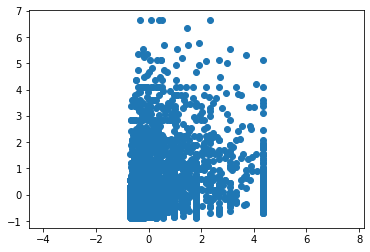

In [49]:
plt.scatter(X_sc[:,0],X_sc[:,1])
plt.axis("equal")

First, we have to select the optimum number of features

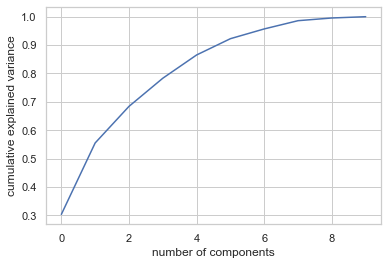

In [190]:
pca = PCA()
fpca.fit(X_sc)

plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance'); 

As we can observe,beyond 8 features, any additional feature basically add noise and no increased variance. Therefore we select 7.

In [51]:
pca = PCA(7)
projected = pca.fit_transform(X_sc)


print("Original shape: {}".format(str(X_sc.shape)))
print("Reduced shape: {}".format(str(projected.shape)))

Original shape: (6321, 10)
Reduced shape: (6321, 7)


Text(0, 0.5, 'Second principal component')

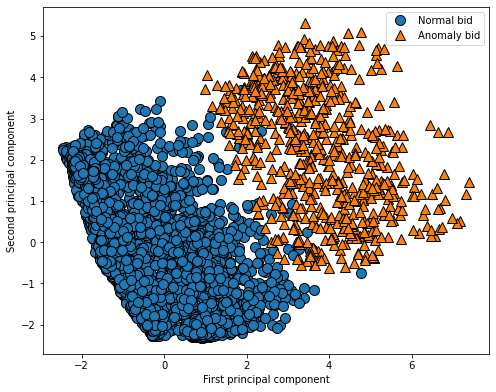

In [52]:
import mglearn
plt.figure(figsize = (8, 8))
mglearn.discrete_scatter(projected[:, 0], projected[:, 1],df1["class"])
plt.legend(labels, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Text(0, 0.5, 'Principal components')

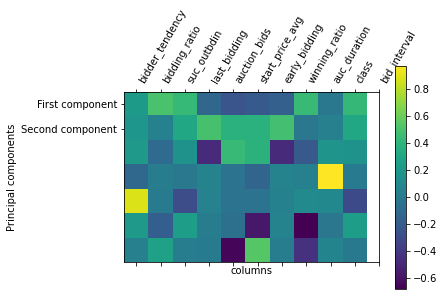

In [53]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(df1.columns)),
df1.columns, rotation=60, ha='left')
plt.xlabel("columns")
plt.ylabel("Principal components")

### <a id='42'>LDA</a>

Linear Discriminant Analysis is a method used in machine learning to classify data by finding the boundaries between different classes in a dataset. It involves using a linear combination of the input features to make predictions and identify the class labels of new data points based on their position relative to the boundaries between the classes. LDA is useful for classification tasks, particularly when the classes are well-separated and the features are linearly correlated with the class labels. It is also efficient to compute and easy to implement (Srivastava and Dhar, 2011).



In [125]:
class_feature_means = pd.DataFrame(columns=labels)
for c, rows in df1.groupby('class'):
    class_feature_means[c] = rows.mean()
class_feature_means


,Normal bid,Anomaly bid,0,1
bidder_tendency,NaN,NaN,0.122403,0.310979
bidding_ratio,NaN,NaN,0.101775,0.344268
suc_outbdin,NaN,NaN,0.016649,0.832593
last_bidding,NaN,NaN,0.450286,0.570463
auction_bids,NaN,NaN,0.227638,0.264797
start_price_avg,NaN,NaN,0.465605,0.533181
early_bidding,NaN,NaN,0.423630,0.489674
winning_ratio,NaN,NaN,0.308242,0.865322
auc_duration,NaN,NaN,4.597060,4.765926
class,NaN,NaN,0.000000,1.000000


In [167]:
lda = LDA()
X_lda = lda.fit_transform(X, y)

a = pd.DataFrame(X_lda)
a

,0
0,1.247398e+14
1,-1.500858e+13
2,-1.500858e+13
3,-1.500858e+13
4,-1.500858e+13
...,...
5051,-1.500858e+13
5052,-1.500858e+13
5053,-1.500858e+13
5054,-1.500858e+13


In [165]:
lda.explained_variance_ratio_

array([1.])

In [180]:
lda.classes_

array([0, 1])

In [184]:
X_lda.shape


(5056, 1)

As our target variable is represented only by 2 classes, the LDA has reduced the number of components to 1. If we had at least two components we would be able to plot the data on the two-dimension graph. However in our case the data is represented by one dimension and the plot would look like a simple one dimension line. I want to create a DataFrame and record there LDA 1 we got as well as the target variable.

In [185]:
a.columns = ['LDA'] 
a['y'] = y 
a.head()

,LDA,y
0,1.247398e+14,0
1,-1.500858e+13,0
2,-1.500858e+13,0
3,-1.500858e+13,0
4,-1.500858e+13,0


 PCA dimensionality reduction method allows us to choose the number of components we need to use. Apart from PCA in LDA we can't control the number of components they will be always reduced by one from number of classes we have represented as a target variable. However, LDA is a better use for solving classification problems as it creates a clear separation between classes.



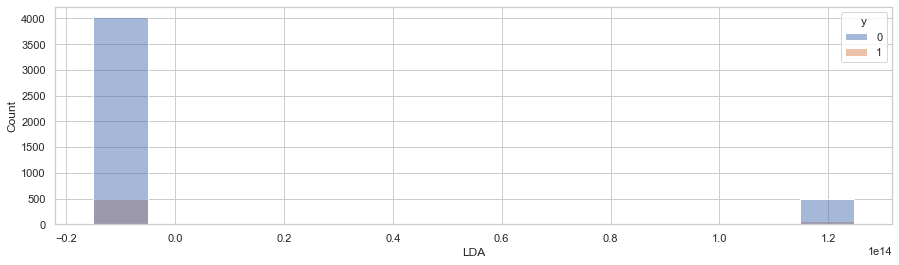

In [186]:
ax = plt.subplots(figsize =(15,4))
sns.set_theme(style="whitegrid") 
sns.histplot(data=a, x='LDA', hue='y') 
plt.show()

The graph above shows that LDA is able to effectively separate the different classes in the dataset. It can be seen that most of the entries classified as 'normal bids' (labeled as 0) are negative on the x-axis, while some of the entries classified as 'anomalous bids' (labeled as 1) are between 2 and 4 on the x-axis and most of them are between 6 and 8. This suggests that the LDA transformation could be a useful preprocessing step for a machine learning model to classify new bids as either normal or anomalous.

## References / Citations

Alzahrani, A. and Sadaoui, S. (2018a). Clustering and Labelling Auction Fraud Data. [online] Research Gate. Available at: https://www.researchgate.net/publication/327173391_Clustering_and_Labelling_Auction_Fraud_Data [Accessed 8 May 2022].

Swati Ganguly and Samira Sadaoui. Classification of imbalanced auction fraud
data. In Canadian Conference on Artificial Intelligence, pages 84–89. Springer,
2017.

Benjamin J Ford, Haiping Xu, and Iren Valova. Identifying suspicious bidders
utilizing hierarchical clustering and decision trees. In IC-AI, pages 195–201, 2010.

 D Ahamad, DAMM Mahmoud, and MM Akhtar. Strategy and implementation
of web mining tools. International Journal of Innovative Research in Advanced
Engineering, 4:01–07, 2017.

CAI, Mile Brandly, and Auctioneer. What is shill bidding? In All about auctions
and auctioneers, with observations on auction law and customary practice. Mike
Brandly Auctioneer, 2016.

1https://www.statista.com
Srivastava and Dhar, 2011).
